# Bonusové zadanie

Roman Berešík<br>
Martin Pažický
***
### Zadanie:

**Výstup**
- Správu vo forme Jupyter notebooku odovzdá jeden člen z dvojice do AISu 
- Deadline 20.12.2021 00:00 
- Len jeden termín lebo nám ide skúšobné obdobie

**Bonus: max 10 bodov**
- 1. krok: Prieskumná analýza (max 5 bodov)
- 2. krok: Modelovanie (max 5 bodov)

### **Percentuálny podiel práce**
**55%** &emsp; Roman Berešík <br>
**45%** &emsp; Martin Pažický <br>
***
### **Dataset** 
The data - Medical MNIST <br>
Link: https://www.kaggle.com/andrewmvd/medical-mnist
***

Since I work with neural networks in my bachelor thesis, I decided to use a simple CNN for the classification task. I will cite several professional articles as well as my bachelor thesis.

### Bibliography: 
[1] - my bachelor thesis, the file is attached as a pdf in the uploaded folder (Roman Berešík)<BR>
[2] - https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15<BR>
[3] - https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2<BR>
[4] - https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/<BR>
[5] - https://www.kaggle.com/frostnt/medical-mnist-pytorch<BR>    

# 1. step: Exploratory analysis (max 5 points)
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations [2].

In [1]:
import numpy as np
import pandas as pd
import os, os.path
from keras.preprocessing.image import ImageDataGenerator
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from skimage import io
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#print classes of images
data_dir = '../bonus/input/medical-mnist'
classes = os.listdir(data_dir)
print(classes)

['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT']


In [3]:
#observe the shape of images
io.imread("../bonus/input/medical-mnist/AbdomenCT/000000.jpeg").shape

(64, 64)

In [4]:
# number of images in directories and total lenght of dateset
print('number of images in AbdomenCT: ' + str(len(os.listdir(data_dir+'/AbdomenCT'))))
print('number of images in BreastMRI: ' + str(len(os.listdir(data_dir+'/BreastMRI'))))
print('number of images in ChestCT: ' + str(len(os.listdir(data_dir+'/ChestCT'))))
print('number of images in CXR: ' + str(len(os.listdir(data_dir+'/CXR'))))
print('number of images in Hand: ' + str(len(os.listdir(data_dir+'/Hand'))))
print('number of images in HeadCT: ' + str(len(os.listdir(data_dir+'/HeadCT'))))
print('total length of dataset: ' + str(len(os.listdir(data_dir+'/AbdomenCT')) + len(os.listdir(data_dir+'/BreastMRI')) + 
                                        len(os.listdir(data_dir+'/ChestCT')) + len(os.listdir(data_dir+'/CXR')) +
                                       len(os.listdir(data_dir+'/Hand')) + len(os.listdir(data_dir+'/HeadCT'))))


number of images in AbdomenCT: 10000
number of images in BreastMRI: 8954
number of images in ChestCT: 10000
number of images in CXR: 10000
number of images in Hand: 10000
number of images in HeadCT: 10000
total length of dataset: 58954


***
First we look at some images from each class for better understading

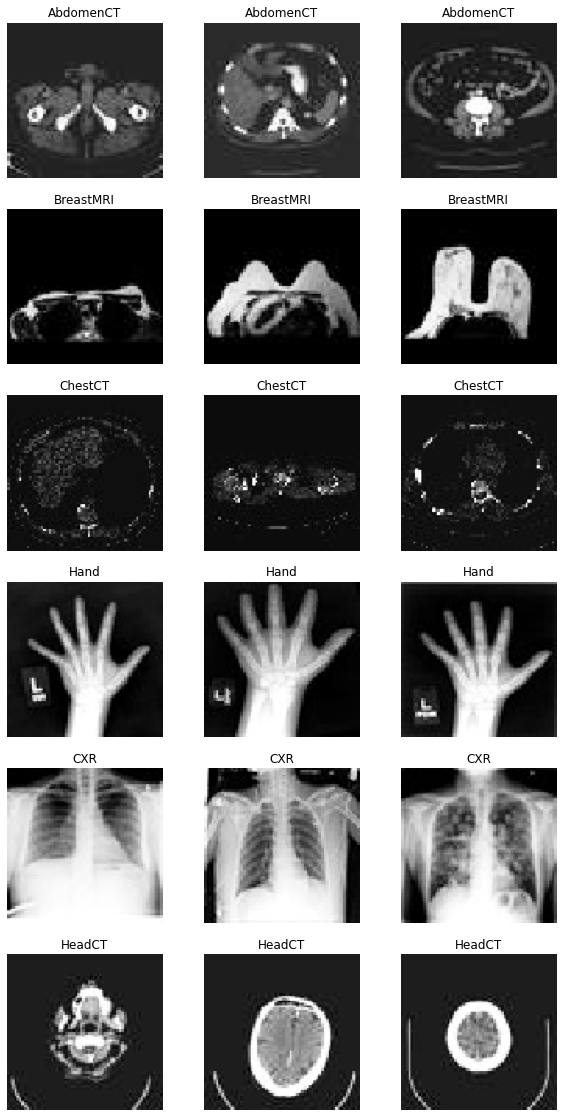

In [5]:
# get the list of jpegs from sub image class folders
AbdomenCT_imgs = [fn for fn in os.listdir(f'{data_dir}/AbdomenCT') if fn.endswith('.jpeg')]
BreastMRI_imgs = [fn for fn in os.listdir(f'{data_dir}/BreastMRI') if fn.endswith('.jpeg')]
ChestCT_imgs = [fn for fn in os.listdir(f'{data_dir}/ChestCT') if fn.endswith('.jpeg')]
CXR_imgs = [fn for fn in os.listdir(f'{data_dir}/CXR') if fn.endswith('.jpeg')]
Hand_imgs = [fn for fn in os.listdir(f'{data_dir}/Hand') if fn.endswith('.jpeg')]
HeadCT_imgs = [fn for fn in os.listdir(f'{data_dir}/HeadCT') if fn.endswith('.jpeg')]

# randomly select 3 from each class
select_AbdomenCT_imgs = np.random.choice(AbdomenCT_imgs, 3, replace = False)
select_BreastMRI_imgs = np.random.choice(BreastMRI_imgs, 3, replace = False)
select_ChestCT_imgs = np.random.choice(ChestCT_imgs, 3, replace = False)
select_CXR_imgs = np.random.choice(CXR_imgs, 3, replace = False)
select_Hand_imgs = np.random.choice(Hand_imgs, 3, replace = False)
select_HeadCT_imgs = np.random.choice(HeadCT_imgs, 3, replace = False)

# plotting all images in 6x3 plot
fig = plt.figure(figsize = (10,20))
for i in range(18):
    if i < 3:
        fp = f'{data_dir}/AbdomenCT/{select_AbdomenCT_imgs[i]}'
        label = 'AbdomenCT'
    elif i >= 3 and i < 6:
        fp = f'{data_dir}/BreastMRI/{select_BreastMRI_imgs[i-3]}'
        label = 'BreastMRI'
    elif i >= 6 and i < 9:
        fp = f'{data_dir}/ChestCT/{select_ChestCT_imgs[i-6]}'
        label = 'ChestCT'
    elif i >= 9 and i < 12:
        fp = f'{data_dir}/Hand/{select_CXR_imgs[i-9]}'
        label = 'Hand'
    elif i >= 12 and i < 15:
        fp = f'{data_dir}/CXR/{select_Hand_imgs[i-12]}'
        label = 'CXR'
    else:
        fp = f'{data_dir}/HeadCT/{select_HeadCT_imgs[i-15]}'
        label = 'HeadCT'
    ax = fig.add_subplot(6, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
    
plt.show()

If we want to analyze the images furhure, it is a good idea to convert it into np.array as many is is a better representation of images for machine learning. 

In [6]:
# defined image size from img.shape
IMAGE_SIZE = 64

# making n X m matrix [3]
def img2np(path, list_of_filename, size = (IMAGE_SIZE, IMAGE_SIZE)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# randomly select 1000 images from each class to speed up the process
select_AbdomenCT_imgs = np.random.choice(AbdomenCT_imgs, 1000, replace = False)
select_BreastMRI_imgs = np.random.choice(BreastMRI_imgs, 1000, replace = False)
select_ChestCT_imgs = np.random.choice(ChestCT_imgs, 1000, replace = False)
select_CXR_imgs = np.random.choice(CXR_imgs, 1000, replace = False)
select_Hand_imgs = np.random.choice(Hand_imgs, 1000, replace = False)
select_HeadCT_imgs = np.random.choice(HeadCT_imgs, 1000, replace = False)

# run the convertion to np.array on image folders
AbdomenCT_imges = img2np(f'{data_dir}/AbdomenCT/', select_AbdomenCT_imgs)
BreastMRI_imges = img2np(f'{data_dir}/BreastMRI/', select_BreastMRI_imgs)
ChestCT_imges = img2np(f'{data_dir}/ChestCT/', select_ChestCT_imgs)
CXR_imges = img2np(f'{data_dir}/CXR/', select_CXR_imgs)
Hand_imges = img2np(f'{data_dir}/Hand/', select_Hand_imgs)
HeadCT_imges = img2np(f'{data_dir}/HeadCT/', select_HeadCT_imgs)

***
Now we can print an avarage image of each class, to do that we can take the average value of each pixel across all observations.

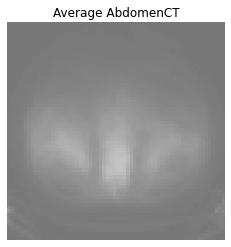

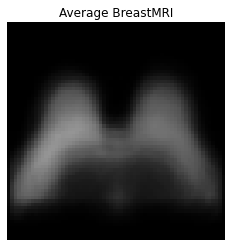

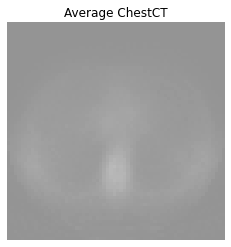

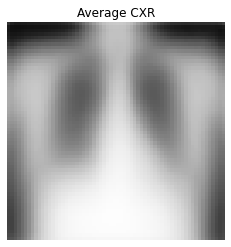

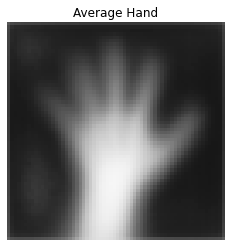

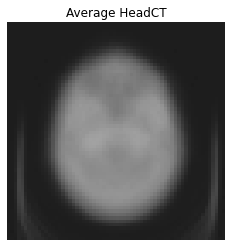

In [7]:
def mean_img(img, title, size = (IMAGE_SIZE, IMAGE_SIZE)):
    # calculate the average from pixels
    mean_img = np.mean(img, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    # plot the image
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

AbdomenCT_mean = mean_img(AbdomenCT_imges, 'AbdomenCT')
BreastMRI_mean = mean_img(BreastMRI_imges, 'BreastMRI')
ChestCT_mean = mean_img(ChestCT_imges, 'ChestCT')
CXR_mean = mean_img(CXR_imges, 'CXR')
Hand_mean = mean_img(Hand_imges, 'Hand')
HeadCT_mean = mean_img(HeadCT_imges, 'HeadCT')

dict_of_means = {'AbdomenCT': AbdomenCT_mean, 
        'BreastMRI': BreastMRI_mean,
        'ChestCT': ChestCT_mean,
        'CXR': CXR_mean, 
        'Hand': Hand_mean,
        'HeadCT': HeadCT_mean
       } 

Now we can observe difference between mean images, representing the whole class.

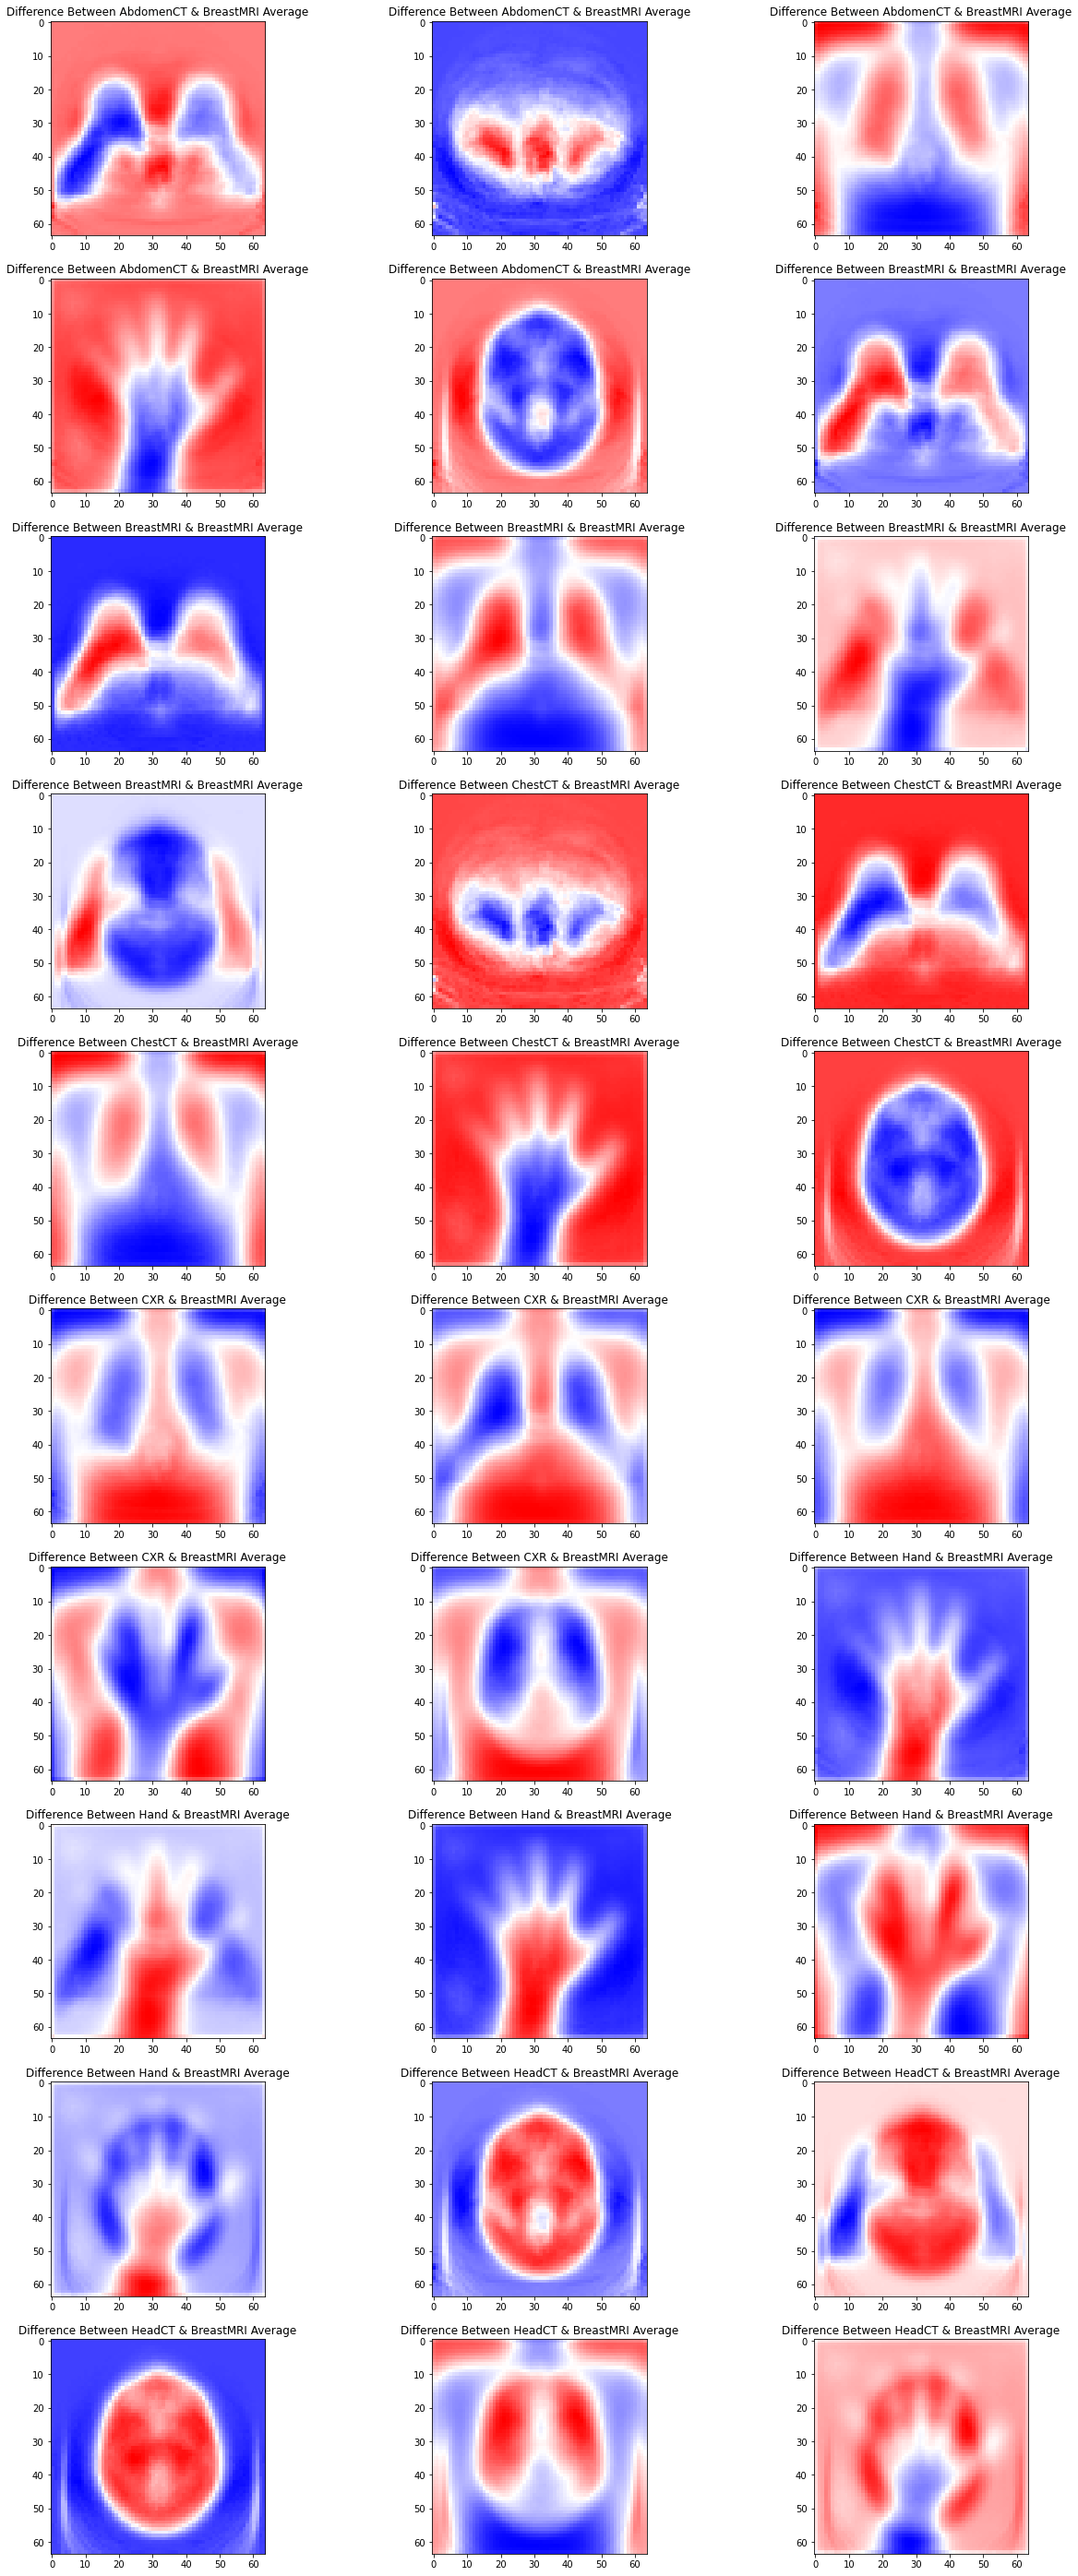

In [8]:
fig = plt.figure(figsize=(21, 50.5))
columns = 3
rows = 10
i = 1
for key1, value1 in dict_of_means.items():
    for key2, value2 in dict_of_means.items():
        if key1 == key2:
            continue
        contrast_mean = value1 - value2
        fig.add_subplot(rows, columns, i)
        plt.imshow(contrast_mean, cmap='bwr')
        plt.title('Difference Between ' + key1 + ' & BreastMRI Average')
        i = i + 1
plt.show()

As we can see, all classes differ significantly from each other in the intensity of pixels in different regions in the image. Classes also contain different types of edges and shapes. CNN is able to learn these features and so we decided to choose it for classification task. 

# 2. step: Modeling (max 5 points)

installing packages

In [9]:
%pip install torch
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


***
As a first step we defined CNN architecute with its layers. We also implement drop out for regularization with propability (0.25) described in Chapter 3.3.4. CNN architectures are described in detail in bachelor thesis in Chapter 3.4, i also described convolution principle, MaxPool and fully connected layers in Chapter 3.4 [1]. 

The forward function is used to pass the input vector through the network and calculate the loss function.
CNN class inspired by architecture in [4].

In [10]:
class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=(3,3))
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(3,3))
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.25)
        self.lin1 = nn.Linear(3136, 64)
        self.lin2 = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = F.relu(self.lin1(x))
        x = self.lin2(x)
        
        return x

***
Selection of hyperparameters is crucial for CNN. I tested multiple combinations of batch_size, num_epochs with different value of learning rate. Because my computer is quite old and has a weaker CPU, neural network training and success evaluation took almost an hour, which severely limited my ability to test the network for a large number of hyperparameter combinations.

***We achieved the best result on parameters defined below***

In [11]:
# As we dont have invidia GPU unit i only use a cpu version
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
in_channels = 1
num_classes = 6 #number of classes
lr = 0.001 #learning rate - determine the size of step in gradient descent 
batch_size = 60 #number of images in one batch/mini-batch
num_epochs = 8 #number of epochs 

In [12]:
#Loading the dataset
#Inspired by loading function in [5]

class MedicalMNIST(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.annotations = df #classes of images
        self.root_dir = root_dir #setting root dir
        self.transform = transform 
    def __len__(self):
        return len(self.annotations)
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0]) #get path to the image
        image = io.imread(img_path) #read image
        y_label = torch.tensor(int(self.annotations.iloc[index, 1])) #label for image
        
        if self.transform:
            image = self.transform(image) #tansform dataframe
        
        return (image, y_label) #return image with assigned label

In [13]:
#load path to images with assigned labels into the dataframe

mp = {}
df = []
for idx, category in enumerate(os.listdir("../bonus/input/medical-mnist")):
    mp[category] = idx
    for image in os.listdir("../bonus/input/medical-mnist/"+category):
        df.append([category+"/"+image, mp[category]])
df = np.array(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,AbdomenCT/000000.jpeg,0
1,AbdomenCT/000001.jpeg,0
2,AbdomenCT/000002.jpeg,0
3,AbdomenCT/000003.jpeg,0
4,AbdomenCT/000004.jpeg,0


In [14]:
dataset = MedicalMNIST(df=df, root_dir="../bonus/input/medical-mnist",
                       transform=transforms.ToTensor())

In [15]:
# train_set, test_set = torch.utils.data.random_split(dataset,
#                                                    [48954,10000])

In [16]:
# split dataset on train and test subset
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=1)

In [17]:
# load the data from subsets into the batches
train_loader = DataLoader(train_set, batch_size=(batch_size), shuffle=True)
test_loader = DataLoader(test_set, batch_size=(batch_size), shuffle=True)

In [18]:
# create CNN model
model = CNN(in_channels, num_classes).to(device)

# Loss
criterion = nn.CrossEntropyLoss()

from optimizers we decided to use Adam (adaptive momentum) since nowdays it is mostly used optimizer. It combines RMSProp with momentum and bias correction, which adjusts the deviations at the start of the algorithm and speeds up the convergence [1].

In [19]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

In [20]:
import matplotlib.pyplot as plt

def my_plot(epochs, loss):
    plt.plot(epochs, loss)

We train the natwork on training subset of data. Whole process of forward pass, backward pass and gradient descent is described in Chapter 3.3.1 and 3.3.2 [1].

In [21]:
# Function for training the network for number of epochs
# Inspired by training function in [5]

def train(model, num_epochs):
    loss_vals=  []
    for epoch in range(num_epochs):
        epoch_loss= []
        for batch, (data, targets) in enumerate(train_loader):
            data = data.to(device=device)
            targets = targets.to(device=device)
            
            #Forward pass
            scores = model(data)
            loss = criterion(scores, targets)
            
            #Backward pass
            optimizer.zero_grad()
            loss.backward()
            
            epoch_loss.append(loss.item())
            
            # Gradient descent
            optimizer.step()
            
        loss_vals.append(sum(epoch_loss)/len(epoch_loss))
        print(epoch, "Current Loss:", loss)
    return loss_vals
            
loss_vals = train(model, num_epochs)

0 Current Loss: tensor(0.0006, grad_fn=<NllLossBackward0>)
1 Current Loss: tensor(3.4649e-05, grad_fn=<NllLossBackward0>)
2 Current Loss: tensor(0.0002, grad_fn=<NllLossBackward0>)
3 Current Loss: tensor(9.4572e-06, grad_fn=<NllLossBackward0>)
4 Current Loss: tensor(6.5760e-05, grad_fn=<NllLossBackward0>)
5 Current Loss: tensor(4.3710e-07, grad_fn=<NllLossBackward0>)
6 Current Loss: tensor(7.9473e-07, grad_fn=<NllLossBackward0>)
7 Current Loss: tensor(8.1857e-06, grad_fn=<NllLossBackward0>)


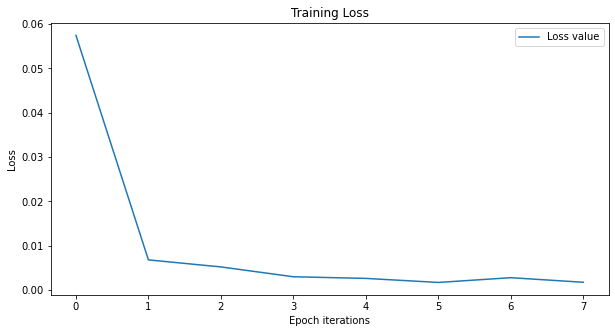

In [26]:
# visualization of loss during the training

plt.figure(figsize=(10,5))
plt.title("Training Loss")
plt.plot(loss_vals,label="Loss value")
plt.xlabel("Epoch iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Finally we evaluate the accuracy on train and test subset of data.

In [23]:
# function for evaluation of the model
# Inspired by training function in [5]

def evaluate(loader, model):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for x,y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            
            scores = model(x)
            _, pred = scores.max(1)
            correct += (pred == y).sum()
            total += pred.size(0)
        print("Accuracy:", correct/total*100, "%")
    
evaluate(train_loader, model)
evaluate(test_loader, model)

Accuracy: tensor(99.9194) %
Accuracy: tensor(99.8897) %


Our model was able to learn good sights on the training data and achieve high accuracy on testing subset, specifically accuracy was ***99.8897%***.